# Bode Plots

With this notebooks Bode-Plots as they are used in conjunction with operational amplifiers are introduced. For Bode-Plots expecially used in signal processing, please refer to more specialized lectures.

In the beginning there ist a complex transferfunction is given in the form

$$ 
v(f) = g_1\frac{1 + j n_1 f}{1+j d_1 f}\cdot
    g_2\frac{1 + j n_2 f}{1+j d_2 f} \cdots
$$

Here, the numerator is $n_0=g$ the DC-gain of the circuit and further coefficients of the numerator. The denomitor, again, has a constant coefficient and two or more delay described as $\tau_i$. For plotting the Bode-plot, only the coefficients are given

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Draw the real and simplied bode plot in one diagram
# g the gain elements
# n numerator elements
# d denominator elements
# g,d,n must have the same length
def bodeplot(g,n,d,freq,s=""):
    if (len(g)!=len(n)) or (len(g)!=len(d)):
        print("All elements must have equal length")
        return
        
    v=[]
    vi=[]
    for f in freq:
        om=np.pi*2*f
        vv=1
        vvi=1
        for ii in range(0,len(g)):
            vv=vv*g[ii]*(1+1j*n[ii]*f)/(1+1j*d[ii]*f)
            if f<1/n[ii]:
                num=1
            else:
                num=1j*n[ii]*f
            if f<1/d[ii]:
                den=1
            else:
                den=1j*d[ii]*f
            
            vvi=vvi*g[ii]*num/den
            
        v.append(vv)
        vi.append(vvi)
        
    # assemble function to show
    s=s+": $"
    for ii in range(0,len(g)):
        s=s+"{:.2G}".format(g[ii])+"\\frac{1+j"+"{:.2G}".format(n[ii])+"f}{1+j"+"{:.2G}".format(d[ii])+"f}"
    s=s+"$"
    fig,ax = plt.subplots(2)    
    ax[0].plot(freq,20*np.log10(np.abs(v)))
    ax[0].plot(freq,20*np.log10(np.abs(vi)))
    ax[0].set_yscale('linear')
    ax[0].set_xscale('log')
    ax[0].grid(axis="both")
    ax[0].set_xlabel("$f$/Hz")
    ax[0].set_ylabel("v/dB")
    fig.suptitle(s)

    ax[1].plot(freq,180/np.pi*np.angle(v))
    ax[1].plot(freq,180/np.pi*np.angle(vi))
    ax[1].set_yscale('linear')
    ax[1].set_xscale('log')
    ax[1].set_yticks(np.linspace(-180,180,num=13))
    ax[1].grid(axis="both")
    ax[1].set_xlabel("$f$/Hz")
    ax[1].set_ylabel("Phase/°")

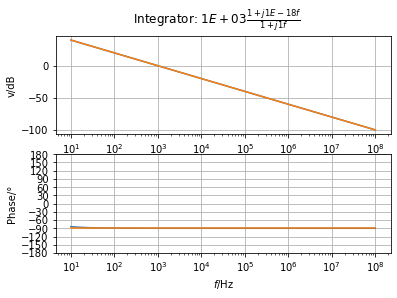

In [3]:
bodeplot([1e3],[1e-18],[1e0],np.logspace(1,8,num=300),s="Integrator")

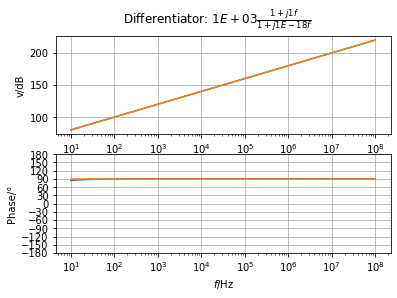

In [4]:
bodeplot([1e3],[1e-0],[1e-18],np.logspace(1,8,num=300),s="Differentiator")

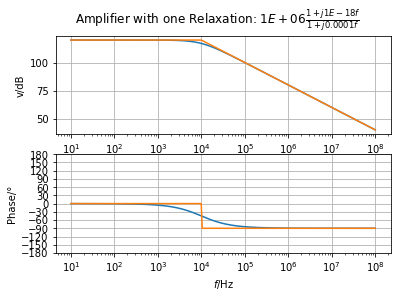

In [5]:
bodeplot([1e6],[1e-18],[1e-4],np.logspace(1,8,num=300),s="Amplifier with one Relaxation")

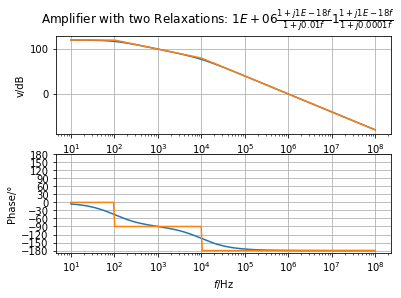

In [6]:
bodeplot([1e6, 1],[1e-18, 1e-18],[1e-2,1e-4],np.logspace(1,8,num=300),s="Amplifier with two Relaxations")

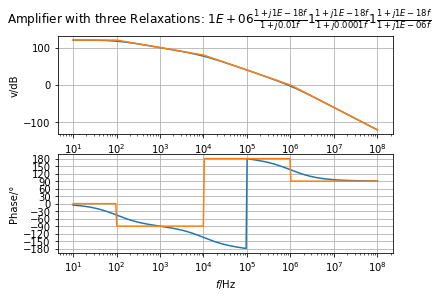

In [7]:
bodeplot([1e6, 1,1],[1e-18, 1e-18,1e-18],[1e-2,1e-4, 1e-6],np.logspace(1,8,num=300),s="Amplifier with three Relaxations")

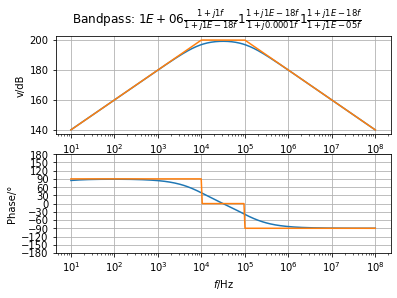

In [8]:
bodeplot([1e6, 1,1],[1e-0, 1e-18,1e-18],[1e-18,1e-4,1e-5],np.logspace(1,8,num=300),s="Bandpass")

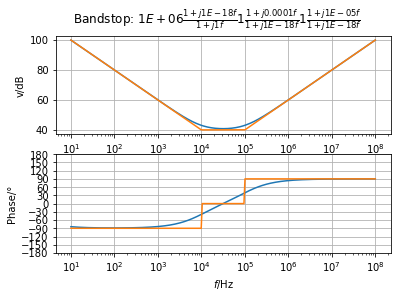

In [9]:
bodeplot([1e6, 1,1],[1e-18,1e-4,1e-5],[1e-0, 1e-18,1e-18],np.logspace(1,8,num=300),s="Bandstop")

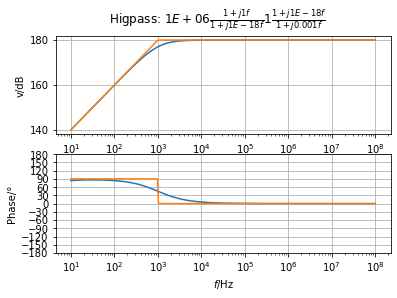

In [10]:
bodeplot([1e6, 1],[1,1e-18],[1e-18, 1e-3],np.logspace(1,8,num=300),s="Higpass")